In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use("ggplot")

# Carregando dados

Vamos começar carregando os dados para cada variável. E carregá-las numa variável.

In [2]:
from pathlib import Path

OUTPUT_FOLDER = Path("../report/figures/")

# Getting a path list
FILES = list(Path("/home/jpsrocha/Documents/Data/GA030/").glob("data1*.dat"))
data = {}

# Looping over and storing data and variable name in a dict
for file in FILES:

    var = file.name.split(".")[0][-1].upper()
    print(var)
    dat = np.loadtxt(file)
    
    data[var] = dat

# Load as global variables for easier testing
globals().update(data)

Y
Q
T
X


# (b) Médias e variância amostrais

Agora vamos calcular as médias e variâncias amostrais

In [3]:
Q.mean(), Q.var()

(np.float64(-8.758442457115927e-05), np.float64(1.9996143451196213))

In [50]:
summary = []

for var, vals in data.items():
    summary.append({"var": var, f"mu": vals.mean().item(), f"sigma": vals.var(ddof=1).item()})

In [49]:
# Theoretical data

st = {
    "Q": {"mu": 0, "sigma": 2},
    "X": {"mu": 0, "sigma": 1/3},
    "Y": {"mu": 20, "sigma": 400},
    "T": {"mu": 6, "sigma": 3.6}
}

Vamos fazer um print formatado para inclusão no relatório.

In [6]:
print("    $bar(mu)$,  $bar(sigma)$,    $mu$,    $sigma$,  $mu$ diff,  $sigma$ diff")
for s in summary:

    mu_s = s["mu"]
    sigma_s = s["sigma"]
    mu = st[s["var"]]["mu"]
    sigma = st[s["var"]]["sigma"]

    mu_diff = abs(mu - mu_s)
    sigma_diff = abs(sigma - sigma_s)
    
    print(f"[{s["var"]}], [{mu_s:>10.5f}], [{sigma_s:>10.5f}], [{mu:>10.5f}], [{sigma:>10.5f}], [{mu_diff:>10.5f}], [{sigma_diff:>10.5f}]")

    $bar(mu)$,  $bar(sigma)$,    $mu$,    $sigma$,  $mu$ diff,  $sigma$ diff
[Y], [  20.00756], [ 400.36964], [  20.00000], [ 400.00000], [   0.00756], [   0.36964]
[Q], [  -0.00009], [   1.99961], [   0.00000], [   2.00000], [   0.00009], [   0.00039]
[T], [   5.99979], [   3.60221], [   6.00000], [   3.60000], [   0.00021], [   0.00221]
[X], [  -0.00023], [   0.33325], [   0.00000], [   0.33333], [   0.00023], [   0.00008]


# (c) Histogramas

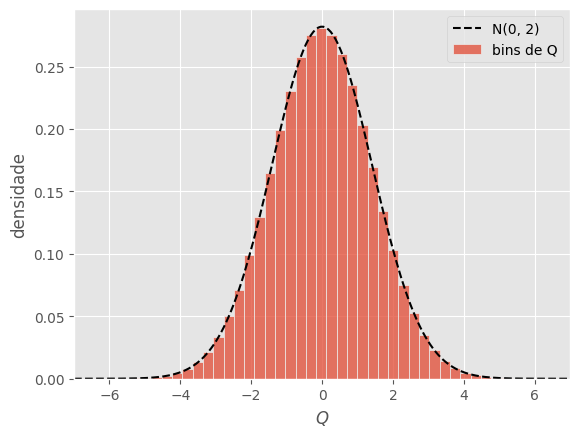

In [96]:
ax = sns.histplot(Q, stat="density",  label="bins de Q", bins=50)

a, b = -7, 7
ax.set(xlabel=r"$Q$", ylabel="densidade", xlim=(a, b))

xs = np.linspace(a, b, 200)
ys = stats.norm(loc=0, scale=np.sqrt(2)).pdf(xs)

ax.plot(xs, ys, c="k", ls="--", label=r"N(0, 2)")

ax.legend()


plt.savefig(OUTPUT_FOLDER / "Q_histogram.svg")

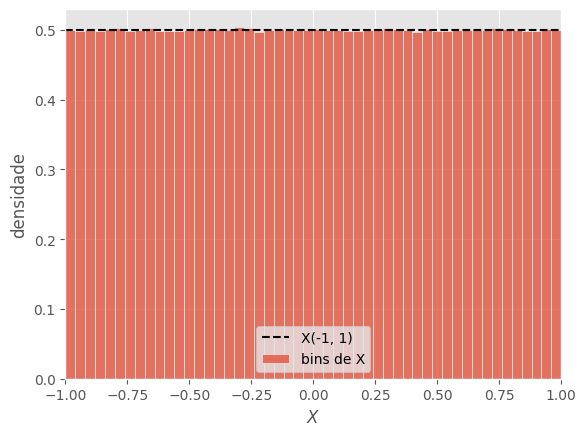

In [95]:
D = X

ax = sns.histplot(D, stat="density",  label="bins de X", bins=50)

a, b = -1, 1
ax.set(xlabel=r"$X$", ylabel="densidade", xlim=(a, b))

xs = np.linspace(a, b, 200)
ys = stats.uniform(-1, 2).pdf(xs)

ax.plot(xs, ys, c="k", ls="--", label=r"X(-1, 1)")

ax.legend()
plt.savefig(OUTPUT_FOLDER / "X_histogram.svg")

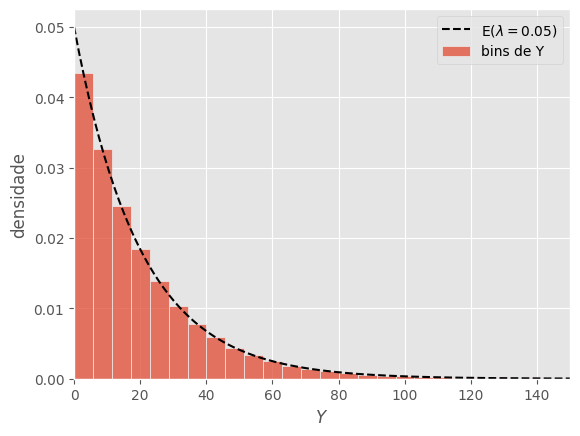

In [94]:
D = Y

a, b = 0, 150
ax = sns.histplot(D, stat="density",  label="bins de Y", bins=50)


ax.set(xlabel=r"$Y$", ylabel="densidade", xlim=(a, b))

xs = np.linspace(a, b, 200)
ys = stats.expon(scale=1/0.05).pdf(xs)

ax.plot(xs, ys, c="k", ls="--", label=r"E($\lambda=0.05$)")

ax.legend()

plt.savefig(OUTPUT_FOLDER / "Y_histogram.svg")

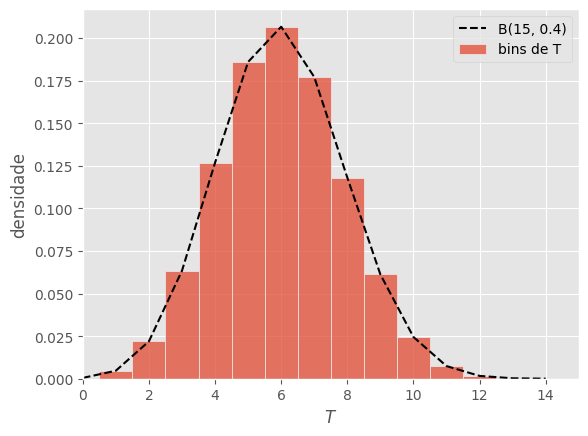

In [93]:
D = T

a, b = 0, 15
xs = np.arange(a, b)
ys = stats.binom.pmf(xs, 15, 0.4)


ax = sns.histplot(D, stat="density",  label="bins de T", discrete=True)


ax.set(xlabel=r"$T$", ylabel="densidade", xlim=(a, b))



ax.plot(xs, ys, c="k", ls="--", label=r"B(15, 0.4)")

ax.legend()
plt.savefig(OUTPUT_FOLDER / "T_histogram.svg")

# Construindo variáveis de média e variância amostral

Precisamos montar as variáveis aleatórias média amostral e variância amostral com amostras de tamanho 5, 10, e 50.




**Inputs**: Variável aleatória

**Output**: Gráfico com 3 variáveis

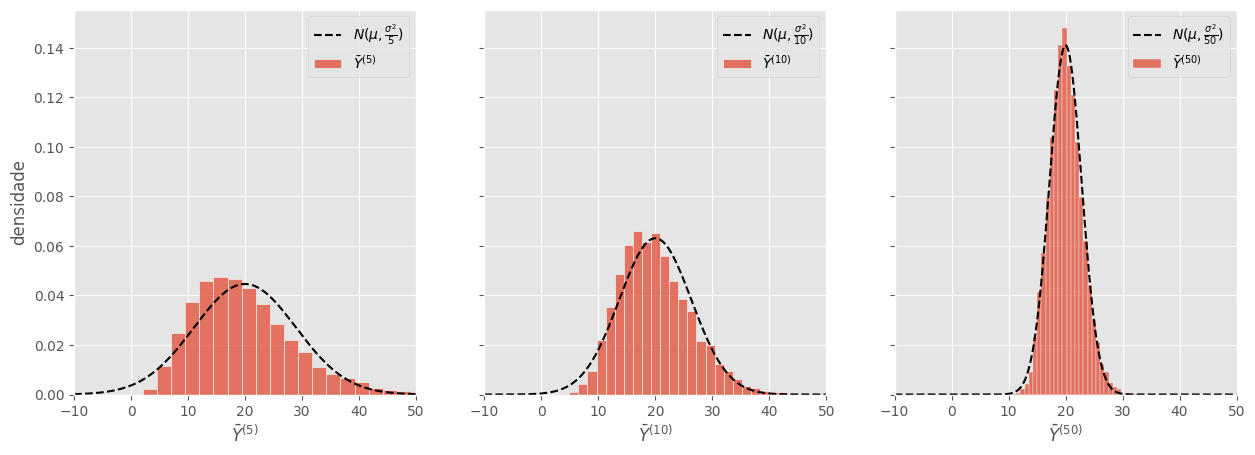

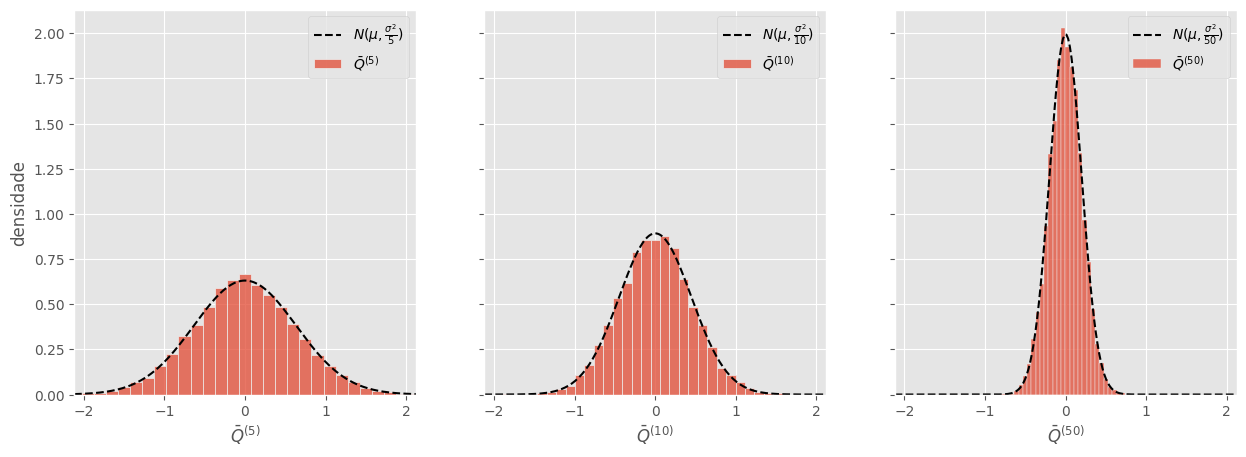

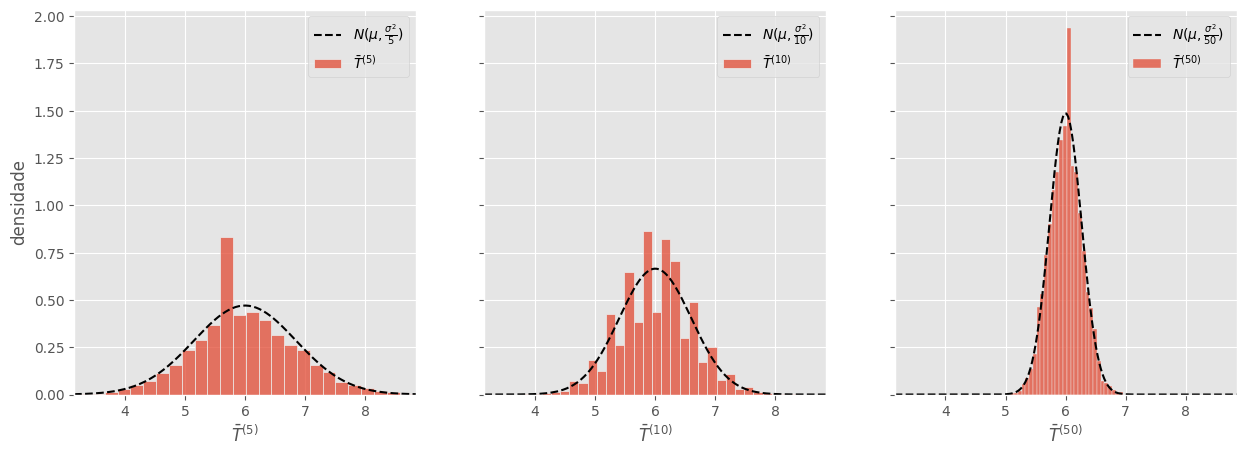

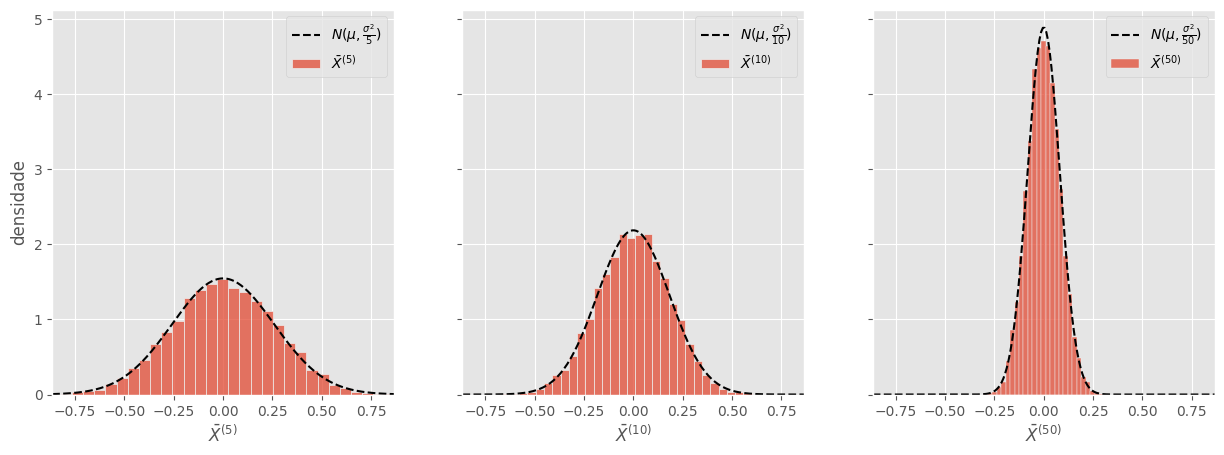

In [97]:
# Definindo tamanhos
sizes = [5, 10, 50]
N = 10_000

# Para cada conjunto de dados
for var, rv in data.items():
    
    # Inicializar figura
    fig, axes = plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(15, 5))
    
    axes[0].set_ylabel("densidade")

    # Para cada tamanho de amostra
    for s, ax in zip(sizes, axes):

        # Computar vetorialmente a estatística
        sample_mean_rv = (
            np.random.choice(rv, size=(N, s)) 
            .mean(axis=1)
        )

        # Montar plot
        a, b = st[var]["mu"] - 1.5*st[var]["sigma"]**0.5, st[var]["mu"] + 1.5*st[var]["sigma"]**0.5
        xs = np.linspace(a, b, 200)
        ys = stats.norm(loc=st[var]["mu"], scale=np.sqrt(st[var]["sigma"]/s)).pdf(xs)
        
        ax.plot(xs, ys, c="k", ls="--", label=r"$N(\mu, \frac{\sigma^2}{"+ str(s) +"})$")
        sns.histplot(sample_mean_rv, stat="density", ax=ax, bins=30, label=r"$\bar{" + var + r"}^{(s)}$".replace("s", str(s)))
        
    
        ax.set_xlabel(r"$\bar{" + var + r"}^{(s)}$".replace("s", str(s)))
        ax.set_xlim(a, b)
        ax.legend()

        # Salvando resultados em formato vetorial.
        plt.savefig(OUTPUT_FOLDER / f"sample_mean_{var}.svg")


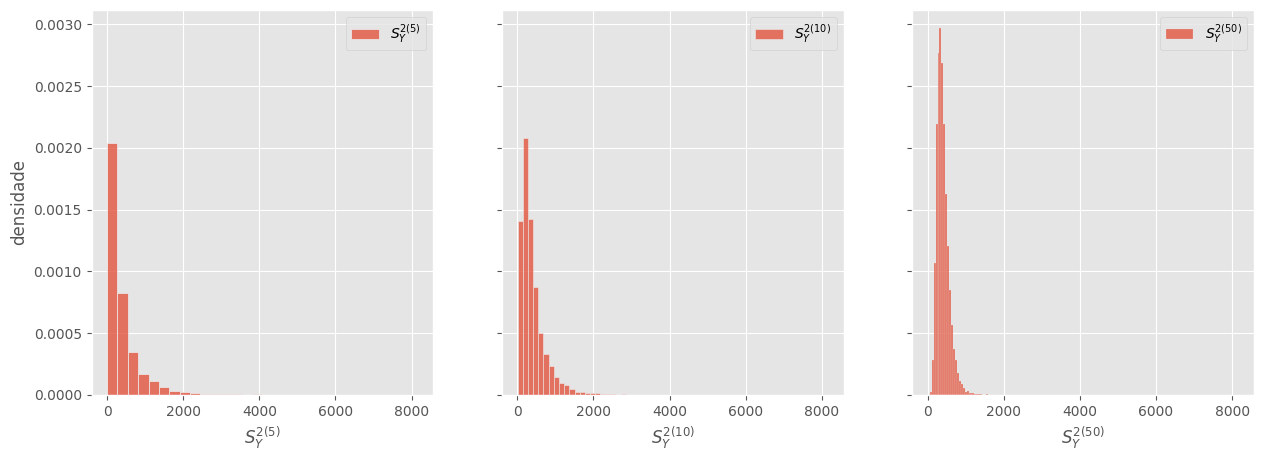

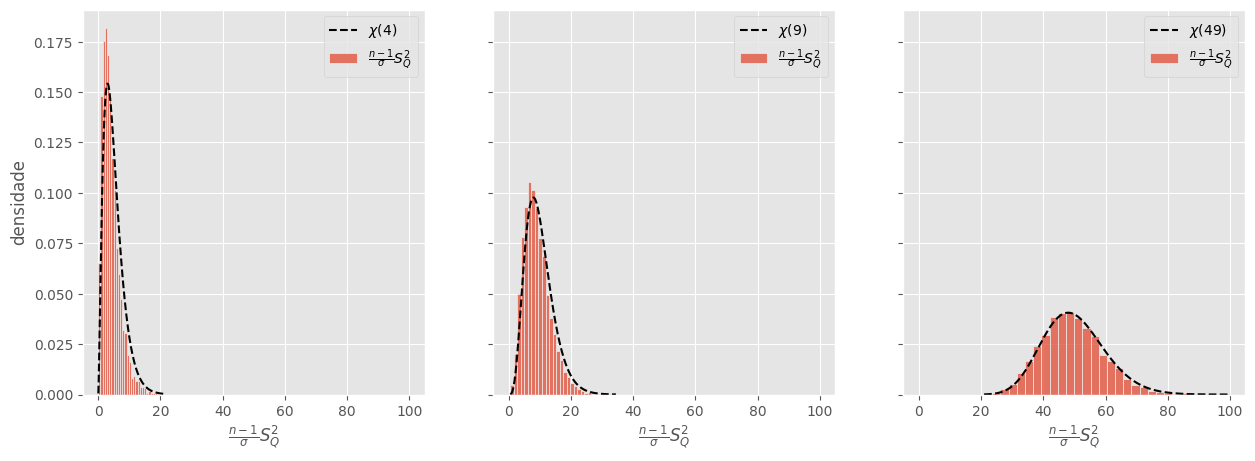

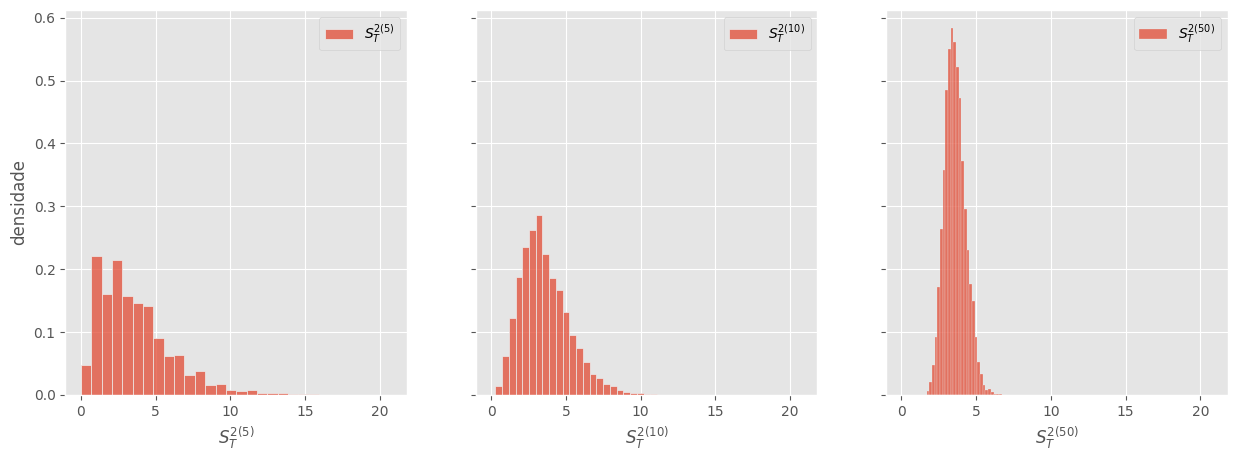

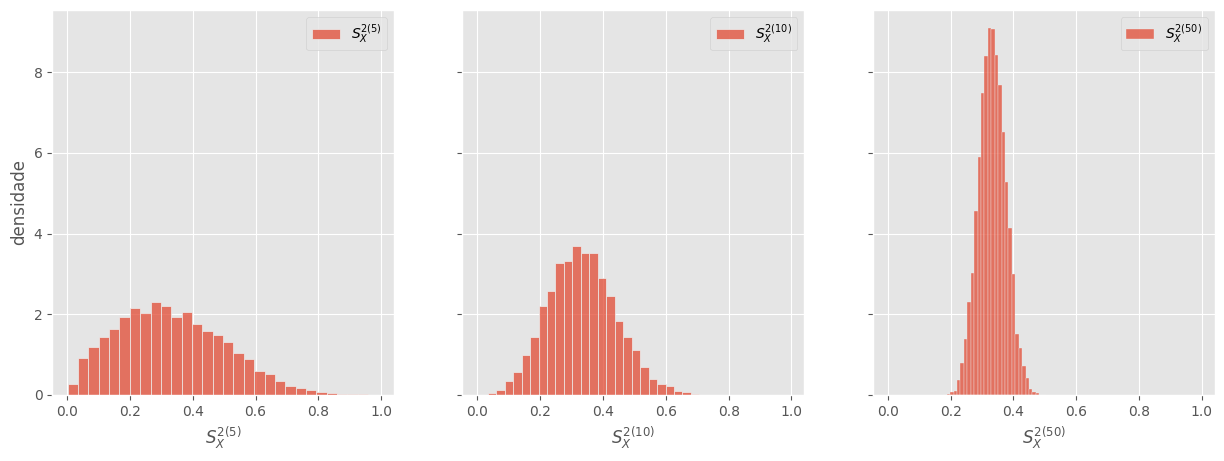

In [98]:
sizes = [5, 10, 50]


N = 10_000

for var, rv in data.items():
    
    # Inicializar figura
    fig, axes = plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(15, 5))
    
    axes[0].set_ylabel("densidade")

    
    for s, ax in zip(sizes, axes):
        
        sample_var_rv = (
            np.random.choice(rv, size=(N, s)) 
            .var(axis=1, ddof=1)
        )

        label = r"$S_" + var + "^{2(s)}$".replace("s", str(s))


        if var == "Q":
            label = r"$\frac{n-1}{\sigma}S_Q^2$"
            sample_var_rv = (s-1)/st[var]["sigma"]*sample_var_rv
            a, b = min(sample_var_rv), max(sample_var_rv)
            xs = np.linspace(a, b, 200)
            ys = stats.chi2.pdf(xs, s)
            ax.plot(xs, ys, c="k", ls="--", label=r"$\chi(" + str(s-1) + ")$")
        

        sns.histplot(sample_var_rv, stat="density", ax=ax, label=label, bins=30)
        
        ax.set_xlabel(label)

        ax.legend()

        plt.savefig(OUTPUT_FOLDER / f"sample_variance_{var}.svg")


